In [ ]:
# Import Libraries and Dependencies

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Dependencies for data cleaning, analysis and manipulation
import pandas as pd
import numpy as np
import statistics
from scipy import stats
from math import floor,ceil
import statsmodels.api as sm

#Dependencies for Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# import scikitplot as skplt

#Dependencies for Feature Extraction, data scaling, and data spliting
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#Dependencies for Logistic Regression
from sklearn.linear_model import LogisticRegression

#Dependencies for K-Nearest Neighbours (KNN)
from sklearn.neighbors import KNeighborsClassifier

#Dependencies for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier


from xgboost import XGBClassifier


#Dependencies for Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#Dependencies for Support Vector Machines
from sklearn.svm import SVC

#Dependencies for Model Evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, accuracy_score, classification_report, roc_curve,auc, f1_score, precision_score, recall_score, roc_auc_score
 
import sklearn.metrics as metrics


# Data Collection

In [ ]:
#Collect data from data source 
#Data Source: http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data

# df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",sep=" ",header=None)

# headers=["Status of existing checking account","Duration in month","Credit history",\
#          "Purpose","Credit amount","Savings account/bonds","Present employment since",\
#          "Installment rate in percentage of disposable income","Personal status and sex",\
#          "Other debtors / guarantors","Present residence since","Property","Age in years",\
#         "Other installment plans","Housing","Number of existing credits at this bank",\
#         "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Cost Matrix(Risk)"]
# df.columns=headers

# #save as csv file
# df.to_csv("germancreditdata.csv",index=False) 
df = pd.read_csv("germancreditdata.csv")

df.head()

In [ ]:
# Target data distribution

df['Cost Matrix(Risk)'].astype(int).plot.hist(color='forestgreen').set_xlabel('Target or dependent variable: 1 or 2');

count = df['Cost Matrix(Risk)'].value_counts()
good_risk = count[1]
bad_risk = count[2]

print("There are {} loans repaid on time (Good Risk, Cost Matrix(Risk) =1) and {} loans defaulted (Bad Risk, Cost Matrix(Risk)=2) in the dataset".format(good_risk, bad_risk))

### Data description

::: German Credit Data:::

1000 entries make up the dataset, which also includes 20 independent variables (13 categorical, 7 numerical), and 1 target variable created by Prof. Hofmann. Each entry in this collection reflects a person who accepts a bank credit. Depending on a set of factors, each person is categorised as either a good or bad credit risk.


Dependent Variable

Feature | Value | Data Type

Creditability:
0: Bad
1: Good




Independent Variables

Feature | Value | Data Type

Account Balance: 
1 : Values < 0 DM
2 : Values is >= 0 and < 200 DM
3 : ... >= 200 DM / salary assignments for at least 1 year
4 : no checking account


Duration of Credit (month)
Payment Status of Previous Credit
Purpose
Credit Amount
Value Savings/Stocks
Length of current employment
Instalment per cent
Sex & Marital Status
Guarantors
Duration in Current address
Most valuable available asset
Age (years)
Concurrent Credits
Type of apartment
No of Credits at this Bank
Occupation
No of dependents
Telephone
Foreign Worker


USA Credit Data


# Data Preprocessing

In [ ]:

# The current CSV file collected contains keys like "A14, A61" for each of the columns
# UCI provides a description of each of this keys. 
# To proceed we need to map this these keys/entries to their respective descriptions by creating 
# a dictionary with a key-value pair for each feature. The key represents current entry, while values represent description
# and using the .map() iterative method. The map() method creates a new array populated with 
# the results of calling a provided function on every element in the calling array.



#Key-Value Pair for 13 categorical features
Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM "}
Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
Telephone={'A192':"yes", 'A191':"none"}
foreign_worker={'A201':"yes", 'A202':"no"}
risk={1:"Good Risk", 2:"Bad Risk"}

#Using Map function to replace values in the columns
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)
df["Credit history"]=df["Credit history"].map(Credit_history)
df["Purpose"]=df["Purpose"].map(Purpose)
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)
df["Present employment since"]=df["Present employment since"].map(Present_employment)
df["Personal status and sex"]=df["Personal status and sex"].map(Personal_status_and_sex)
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)
df["Property"]=df["Property"].map(Property)
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)
df["Housing"]=df["Housing"].map(Housing)
df["Job"]=df["Job"].map(Job)
df["Telephone"]=df["Telephone"].map(Telephone)
df["foreign worker"]=df["foreign worker"].map(foreign_worker)
df["Cost Matrix(Risk)"]=df["Cost Matrix(Risk)"].map(risk)


df.head(2)

# Data Understanding

In [ ]:
## Data Understanding
df.info()
#df.isna().sum(axis = 0)
#df.shape



#Observation: No null values

#Statistical view of numerical variables
df[["Credit amount","Age in years","Duration in month"]].describe()


In [ ]:
#Checking for and removal of outliers

sns.set()
f, axes = plt.subplots(1, 3,figsize=(15,5))
sns.boxplot(y=df["Credit amount"],x=df["Cost Matrix(Risk)"],orient='v' , ax=axes[0],palette=["#800080","#808000"]) #box plot
sns.boxplot(y=df["Duration in month"],x=df["Cost Matrix(Risk)"], orient='v' , ax=axes[1],palette=["#800080","#808000"]) #box plot
sns.boxplot(y=df["Age in years"],x=df["Cost Matrix(Risk)"], orient='v' , ax=axes[2],palette=["#800080","#808000"]) #box plot
plt.show()


## Replacement of outliers using IQR

In [ ]:
# Correlation Analysis
## Closely correlated values selected using P-Values or IV are further
## filtered using correlation analysis removed. 

# Feature Selection and Engineering

In [ ]:
#Feature Selection for German Data



# Using P-Values
column_names_cat_stats=["Status of existing checking account","Credit history","Purpose",\
"Savings account/bonds","Present employment since",\
"Installment rate in percentage of disposable income","Personal status and sex",\
"Other debtors / guarantors","Present residence since","Property",\
"Other installment plans","Housing","Number of existing credits at this bank",\
"Job","Number of people being liable to provide maintenance for","Telephone","foreign worker"]



# P-Values for Categorical variables
statistical_significance=[]
for attr in column_names_cat_stats:
    data_count=pd.crosstab(df[attr],df["Cost Matrix(Risk)"]).reset_index()
    obs=np.asarray(data_count[["Bad Risk","Good Risk"]])
    chi2, p, dof, expected = stats.chi2_contingency(obs)
    statistical_significance.append([attr,round(p,6)])
    
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]
statistical_significance.to_csv("pvaluescategorical.csv", index=False)

#display(statistical_significance)


# P-Values for Numerical variables
statistical_significance=[]
column_names_cont_stats=["Credit amount","Age in years","Duration in month"]
good_risk_df = df[df["Cost Matrix(Risk)"]=="Good Risk"]
bad_risk_df = df[df["Cost Matrix(Risk)"]=="Bad Risk"]
for attr in column_names_cont_stats:
    statistic, p=stats.f_oneway(good_risk_df[attr].values,bad_risk_df[attr].values)
    statistical_significance.append([attr,round(p,6)])
statistical_significance=pd.DataFrame(statistical_significance)
statistical_significance.columns=["Attribute","P-value"]
#display(statistical_significance)

#PValues
pvalues_categorical = pd.read_csv('pvaluescategorical.csv')
pvalues_categorical = pvalues_categorical.sort_values(by=['P-value'], ascending=False)

pvalues_categorical 



# Using Information-Values (IV)

# Weight of Evidence
# https://medium.com/@finntanweelip/feature-selection-in-credit-scoring-b0eee604cd51 

#Feature Selection Home Credit Risk Data
 


In [ ]:
# Viewing and Handling Data Imbalance

def visualize_distribution(attr):
    good_risk_df = df[df["Cost Matrix(Risk)"]=="Good Risk"]
    bad_risk_df = df[df["Cost Matrix(Risk)"]=="Bad Risk"]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    attr_good_risk_df = good_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    attr_bad_risk_df = bad_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    ax[0].barh( attr_good_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_good_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="#800080")
    ax[1].barh( attr_bad_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_bad_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="#808000")
    ax[0].set_title('Good Risk')
    ax[1].set_title('Bad Risk')
    ax[0].invert_xaxis()
    ax[1].yaxis.tick_right()
    
    num_para_change=["Present residence since","Number of existing credits at this bank","Installment rate in percentage of disposable income","Number of people being liable to provide maintenance for"]
    if attr in num_para_change:
        for i, v in enumerate(attr_good_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[0].text(v+15, i+1, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[1].text(v+2, i+1, str(v), color='black')
    else:
        for i, v in enumerate(attr_good_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[0].text(v+25, i + .05, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[1].text(v+1, i + .05, str(v), color='black')
    plt.suptitle(attr)
    plt.tight_layout()
    plt.show()

In [ ]:
visualize_distribution("Status of existing checking account")
visualize_distribution("Credit history")
visualize_distribution("Purpose")


In [ ]:
#OneHotEnconding


#Drop 7 columns not selected
df = df.drop(columns=['Number of people being liable to provide maintenance for',\
                      'Present residence since',\
                      'Number of existing credits at this bank',\
                      'Job',\
                      'Telephone',\
                      'Other debtors / guarantors',\
                      'Installment rate in percentage of disposable income'
                     ])


#10 Selected features with statistical significance
col_cat_names=["Status of existing checking account","Credit history","Purpose",\
"Savings account/bonds","Present employment since",\
"Personal status and sex","Property","Other installment plans","Housing","foreign worker"]

for attr in col_cat_names:
    df = df.merge(pd.get_dummies(df[attr], prefix=attr), left_index=True, right_index=True)
    df.drop(attr,axis=1,inplace=True)
 
#converting target variable into numeric
risk={"Good Risk":1, "Bad Risk":0}
df["Cost Matrix(Risk)"]=df["Cost Matrix(Risk)"].map(risk)

df

In [ ]:
# Target data distribution

df['Cost Matrix(Risk)'].astype(int).plot.hist(color='forestgreen').set_xlabel('Target or dependent variable: 1 or 0');

count = df['Cost Matrix(Risk)'].value_counts()
good_risk = count[1]
bad_risk = count[0]

print("There are {} loans repaid on time (Good Risk, Cost Matrix(Risk) =1) and {} loans defaulted (Bad Risk, Cost Matrix(Risk)=0) in the dataset".format(good_risk, bad_risk))

In [ ]:
#Principal Component Analysis (PCA): Dimensionality Reduction

X = df.drop('Cost Matrix(Risk)', 1).values #independent variables
y = df["Cost Matrix(Risk)"].values #target variables

pca = PCA(n_components=16)
X = pca.fit_transform(X)

In [ ]:
# Spliting dataset into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=0)

# Credit Risk Model Development and Fit

#### XGBoost Classifier

In [ ]:
# Train Model

model_xgboost =XGBClassifier()
model_xgboost.fit(X_train, y_train)

# Model Prediction
y_pred = model_xgboost.predict(X_test)


# Metrics
acc_xgboost = round(accuracy_score(y_test,y_pred)*100,2)
class_met_xgboost = classification_report(y_test,y_pred)  
# cm_xgb = confusion_matrix(y_test, y_pred, labels=model_xgboost.classes_)


In [ ]:
cm_disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp.plot()

In [ ]:
TP = 58
TN = 172
FP = 28
FN = 42
ACC = round(((TP + TN) / (TP + TN + FP + FN))*100,2)
print(f"XGBoost Accuracy (%):{ACC}")

TPR = round((TP / (TP + FN))*100,2) 
print(f"XGBoost Sensitivity, TPR (%):{TPR}")

SP = round((TN / (FP + TN))*100,2)

print(f"XGBoost Specificity (%): {SP}")
      

#### Support Vector Machines (SVM)

In [ ]:
#Support Vector Machines

# Train the model
model_svm = SVC(kernel = 'linear', random_state = 0, probability=True)  
model_svm.fit(X_train, y_train) 

# Model Prediction
y_pred_svm = model_svm.predict(X_test)



# Metrics
cm_svm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
acc_svm = round(accuracy_score(y_test,y_pred)*100,2)
class_met_svm = classification_report(y_test,y_pred_svm)



# Model Evaluation

#### Accuracy

In [ ]:
print(f"XGBoost Accuracy(%): {acc_xgboost}")
print(f"SVM Accuracy(%): {acc_svm}")

#### Precision, Recall and F1-Score

In [ ]:
print("---------- XGBoost Classification Report----------")
print("")
print(class_met_xgboost)


print("----------SVM Classification Report-----------")
print("")
print(class_met_svm)

#### Confusion Matrix

In [ ]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=model_svm.classes_)
disp.plot()

In [ ]:
TP = 35
TN = 188
FP = 51
FN = 26
ACC = round(((TP + TN) / (TP + TN + FP + FN))*100,2)
print(f"Accuracy (%):{ACC}")

TPR = round((TP / (TP + FN))*100,2) 
print(f"Sensitivity, TPR (%):{TPR}")

SP = round((TN / (FP + TN))*100,2)

print(f"SVM Specificity (%): {SP}")
      

#### ROC

In [ ]:

# SVM ROC

y_pred_svmroc = model_svm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svmroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.show()

# XGBoost ROC

y_pred_xgbroc = model_xgboost.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgbroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.show()

In [113]:
TP = 58
TN = 172
FP = 28
FN = 42
ACC = round(((TP + TN) / (TP + TN + FP + FN))*100,2)
print(f"XGBoost Accuracy (%):{ACC}")

TPR = round((TP / (TP + FN))*100,2) 
print(f"XGBoost Sensitivity, TPR (%):{TPR}")

SP = round((TN / (FP + TN))*100,2)

print(f"XGBoost Specificity (%): {SP}")
      

XGBoost Accuracy (%):76.67
XGBoost Sensitivity, TPR (%):58.0
XGBoost Specificity (%): 86.0


#### Support Vector Machines (SVM)

In [122]:
#Support Vector Machines

# Train the model
model_svm = SVC(kernel = 'linear', random_state = 0, probability=True)  
model_svm.fit(X_train, y_train) 

# Model Prediction
y_pred_svm = model_svm.predict(X_test)



# Metrics
cm_svm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
acc_svm = round(accuracy_score(y_test,y_pred)*100,2)
class_met_svm = classification_report(y_test,y_pred_svm)



# Model Evaluation

#### Accuracy

In [123]:
print(f"XGBoost Accuracy(%): {acc_xgboost}")
print(f"SVM Accuracy(%): {acc_svm}")

XGBoost Accuracy(%): 74.33
SVM Accuracy(%): 74.33


#### Precision, Recall and F1-Score

In [105]:
print("---------- XGBoost Classification Report----------")
print("")
print(class_met_xgboost)


print("----------SVM Classification Report-----------")
print("")
print(class_met_svm)

---------- XGBoost Classification Report----------

              precision    recall  f1-score   support

           0       0.58      0.67      0.62        86
           1       0.86      0.80      0.83       214

    accuracy                           0.77       300
   macro avg       0.72      0.74      0.73       300
weighted avg       0.78      0.77      0.77       300

----------SVM Classification Report-----------

              precision    recall  f1-score   support

           0       0.56      0.06      0.11        86
           1       0.72      0.98      0.83       214

    accuracy                           0.72       300
   macro avg       0.64      0.52      0.47       300
weighted avg       0.67      0.72      0.62       300



#### Confusion Matrix

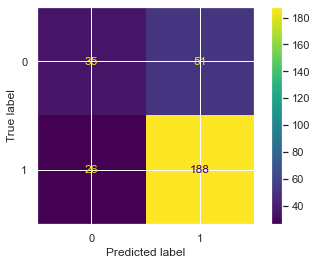

In [121]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=model_svm.classes_)
disp.plot()

In [116]:
TP = 35
TN = 188
FP = 51
FN = 26
ACC = round(((TP + TN) / (TP + TN + FP + FN))*100,2)
print(f"Accuracy (%):{ACC}")

TPR = round((TP / (TP + FN))*100,2) 
print(f"Sensitivity, TPR (%):{TPR}")

SP = round((TN / (FP + TN))*100,2)

print(f"SVM Specificity (%): {SP}")
      

Accuracy (%):74.33
Sensitivity, TPR (%):57.38
SVM Specificity (%): 78.66


#### ROC

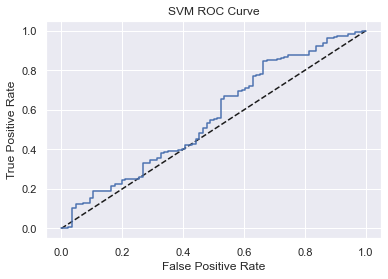

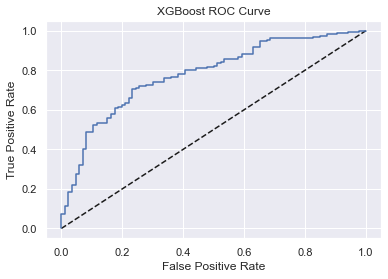

In [110]:

# SVM ROC

y_pred_svmroc = model_svm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svmroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.show()

# XGBoost ROC

y_pred_xgbroc = model_xgboost.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgbroc)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.show()

# GUI to avoid blackbox